In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [2]:
# Load the dataset
# Replace 'customer_data.csv' with your actual file path
df = pd.read_csv('Wholesale customers data.csv')

# Check the first few rows
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Check for missing values
df.isnull().sum()

# Handle missing values if any
# Here, we're filling them with the mean (you can choose other methods based on your data)
df.fillna(df.mean(), inplace=True)

# Feature scaling (normalizing the data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert scaled data back to a DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)


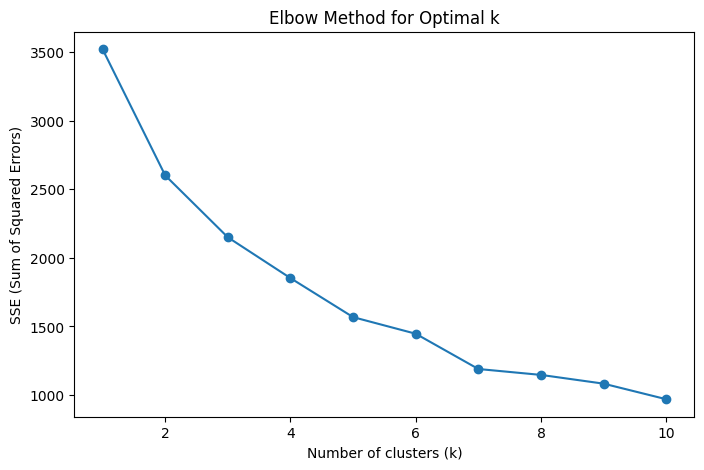

K-means Silhouette Score: 0.34819485747460033


In [4]:
# Elbow method to find optimal number of clusters
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

# From the plot, choose the optimal k (e.g., k=4)
optimal_k = 4

# K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans_labels

# Evaluate K-means using silhouette score
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f"K-means Silhouette Score: {kmeans_silhouette}")


In [5]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Add the DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Evaluate DBSCAN using silhouette score (excluding noise points labeled as -1)
if len(set(dbscan_labels)) > 1:  # Only calculate silhouette if there's more than 1 cluster
    dbscan_silhouette = silhouette_score(scaled_df[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN formed a single cluster or found only noise points.")


DBSCAN Silhouette Score: 0.3942730326713666


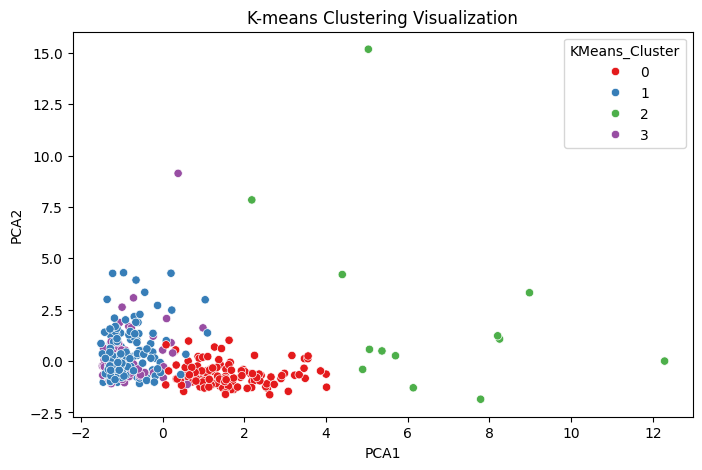

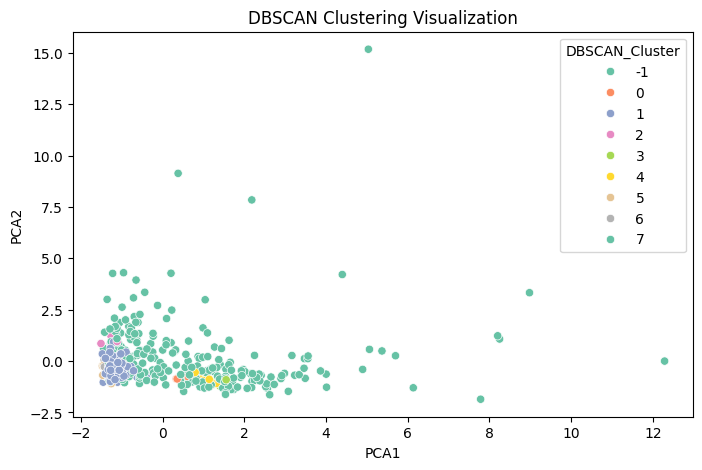

In [6]:
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['KMeans_Cluster'] = kmeans_labels
pca_df['DBSCAN_Cluster'] = dbscan_labels

# K-means clusters visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=pca_df, palette='Set1')
plt.title('K-means Clustering Visualization')
plt.show()

# DBSCAN clusters visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=pca_df, palette='Set2')
plt.title('DBSCAN Clustering Visualization')
plt.show()


In [7]:
# Save the dataframe with clusters to a CSV
df.to_csv('Wholesale customers data.csv', index=False)
print("Customer segments saved successfully!")


Customer segments saved successfully!
